# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auto_mpg_data = pd.read_csv("/content/drive/MyDrive/Classes/MIT/ADSP/Coursework/9 - Elective Project/Data Analysis and Visualization/Auto-mpg/auto-mpg.csv")

### **Data Overview**


In [ ]:
auto_mpg_data.shape

(398, 8)

In [ ]:
n = 398

In [ ]:
auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [ ]:
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


## **Data Preprocessing and Exploratory Data Analysis**


In [ ]:
auto_mpg_data.loc[:,"horsepower"] #horsepower has an "object" data type above, but when checking this column, it is numerical

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [ ]:
#finding non-numerical entry in horsepower column
def non_numeric_horsepower(x):
  try:
    float(x)
    return False
  except:
    return True

non_numeric_horsepower_list = auto_mpg_data[auto_mpg_data['horsepower'].apply(non_numeric_horsepower)]
print(non_numeric_horsepower_list['horsepower'])

Series([], Name: horsepower, dtype: float64)


In [ ]:
non_numeric_horsepower_list['horsepower'].sum() #total number of problematic entries

'??????'

In [ ]:
auto_mpg_data['horsepower']=pd.to_numeric(auto_mpg_data['horsepower'], errors='coerce')

In [ ]:
#testing if solved
auto_mpg_data.loc[[32, 126, 330, 336, 354, 374], 'horsepower']

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: horsepower, dtype: float64

In [ ]:
average_horsepower = auto_mpg_data['horsepower'].mean()
median_horsepower = auto_mpg_data['horsepower'].median()

print(average_horsepower)
print(median_horsepower)

104.46938775510205
93.5


In [ ]:
from scipy.stats import skew
is_horsepower_skewed = skew(auto_mpg_data['horsepower'].dropna())
print(is_horsepower_skewed)

1.0831611646869432


In [ ]:
#since horsepower is skewed, I will use median to impute the missing horsepower values
auto_mpg_data['horsepower'].fillna(median_horsepower, inplace=True)

In [ ]:
#checking if successful
auto_mpg_data['horsepower'].dtype

dtype('float64')

In [ ]:
auto_mpg_data.isnull().sum() #checking this shows that there are no missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [ ]:
auto_mpg_data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
car name        305
dtype: int64

In [ ]:
auto_mpg_data_copy = auto_mpg_data.copy
auto_mpg_data.drop(['car name'], axis=1, inplace=True) #dropping car name because there are over 300 unique entres (out of 398 total entries) and it is an 'object' data type

### **Summary Statistics**

In [ ]:
auto_mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


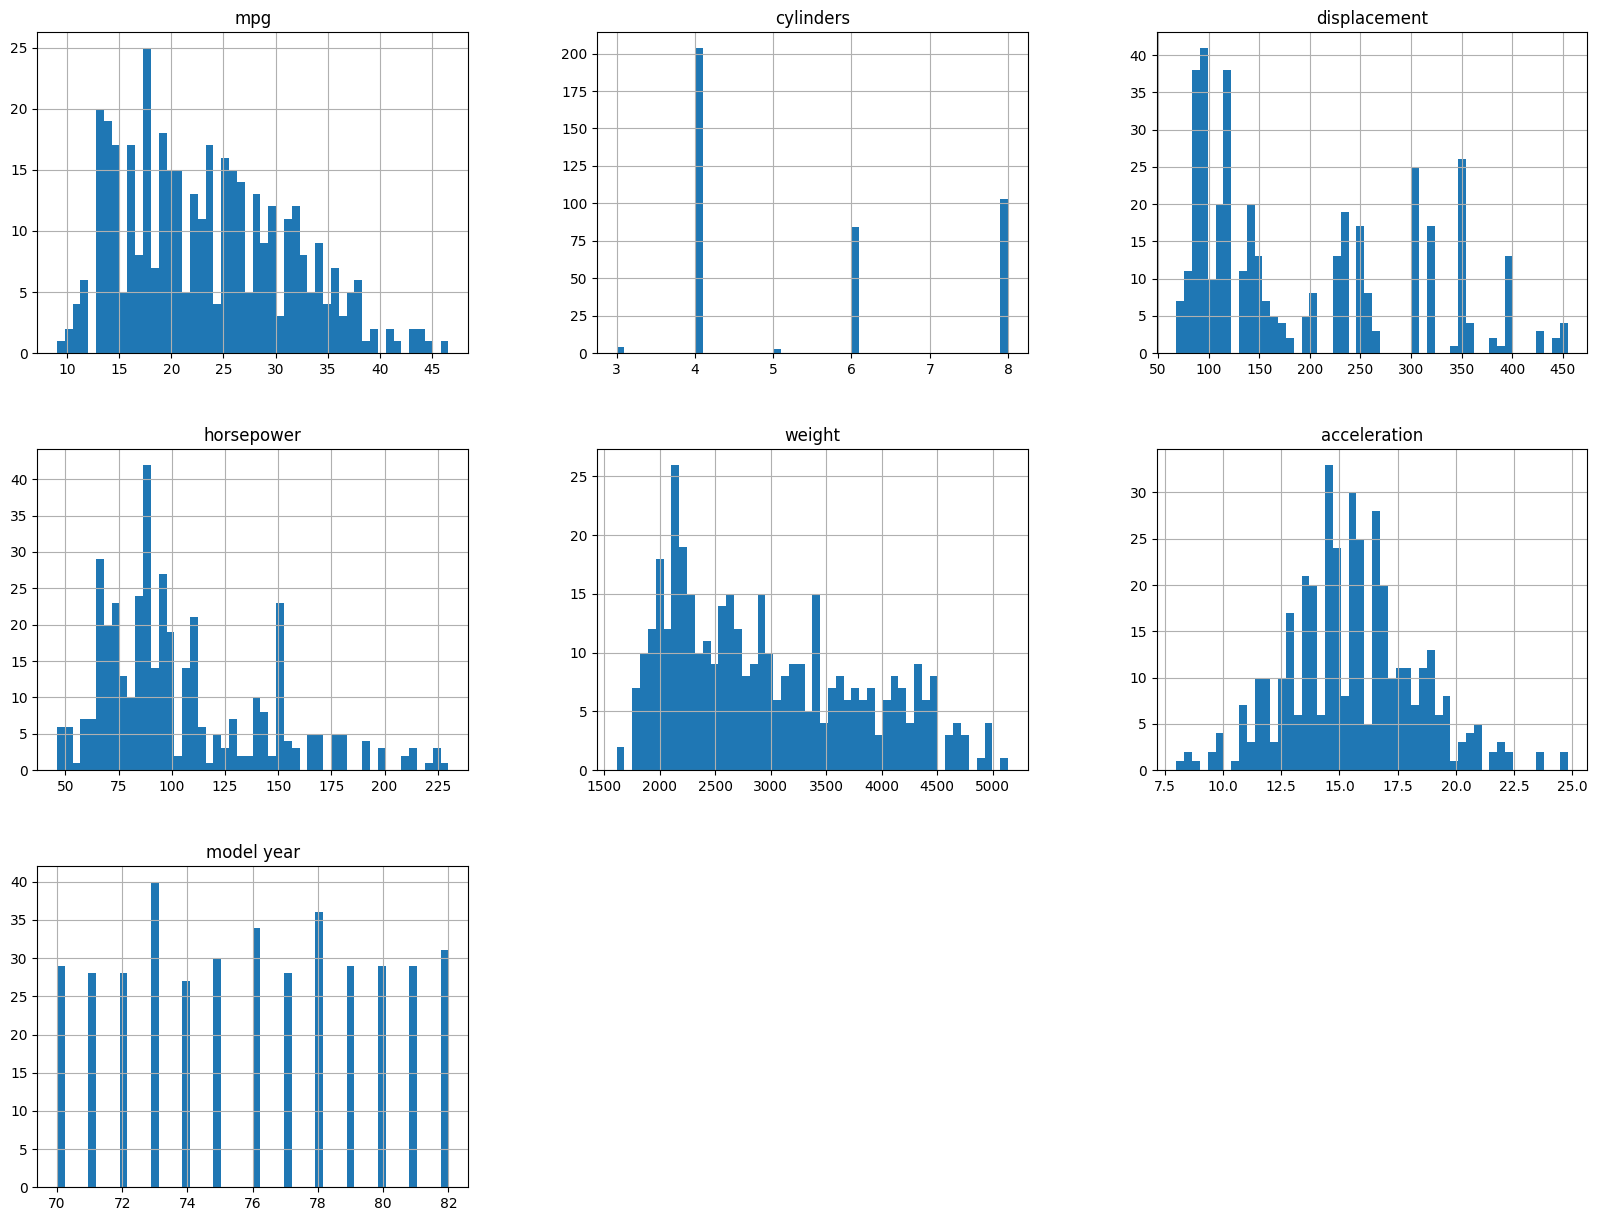

In [ ]:
# check distrbution and outliers
auto_mpg_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
for x in auto_mpg_data.columns:
  skewness = skew(auto_mpg_data[x])
  print(x)
  print(skewness)

mpg
0.45534192556309266
cylinders
0.5249335774421718
displacement
0.716930089340474
horsepower
1.1020507336340302
weight
0.5290589216608383
acceleration
0.27772507624356363
model year
0.011491076335909905


0.45534192556309266


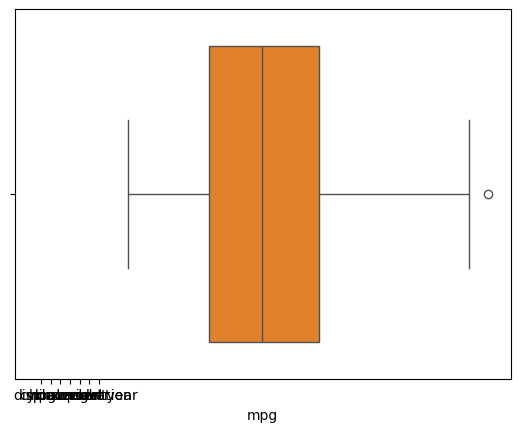

0.5249335774421718


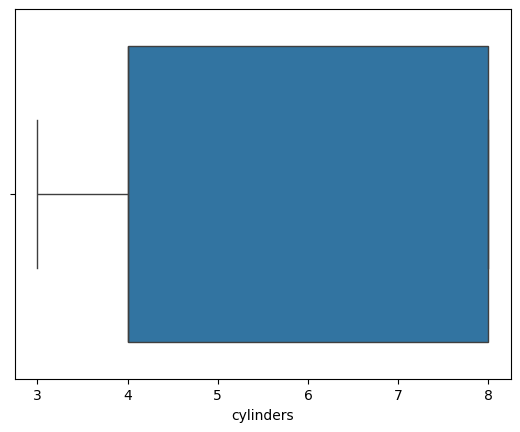

0.716930089340474


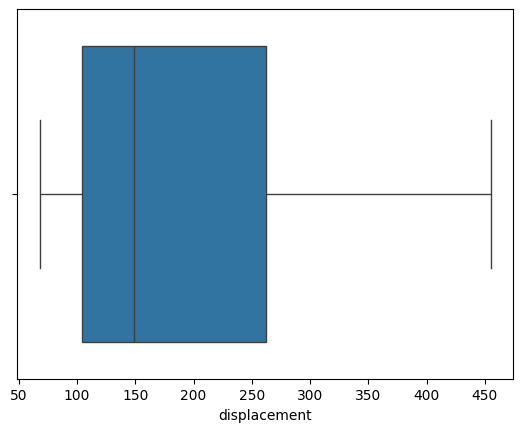

1.1020507336340302


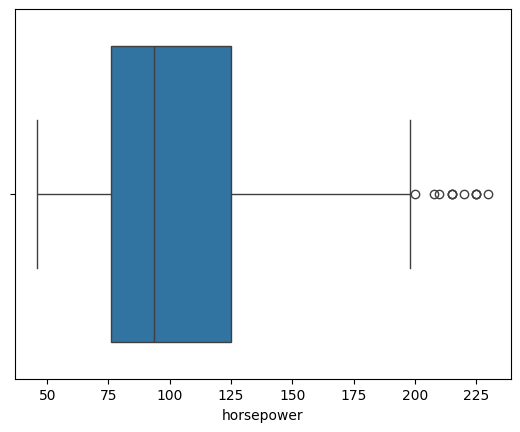

0.5290589216608383


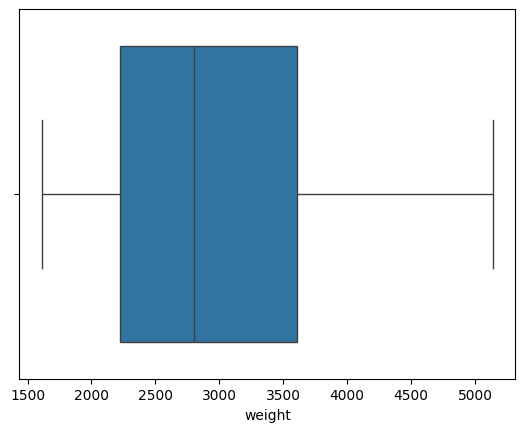

0.27772507624356363


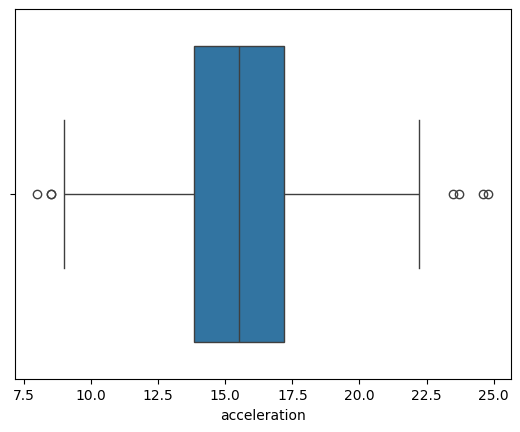

0.011491076335909905


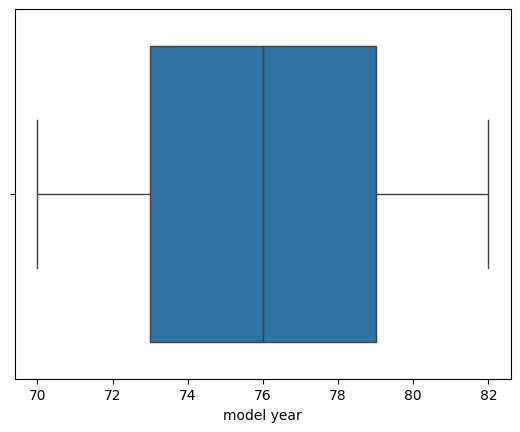

In [ ]:
sns.boxplot(data=auto_mpg_data)
for x in auto_mpg_data.columns:
  sns.boxplot(x=auto_mpg_data[x])
  skewness = skew(auto_mpg_data[x])
  print(skewness)
  plt.show()

<Axes: >

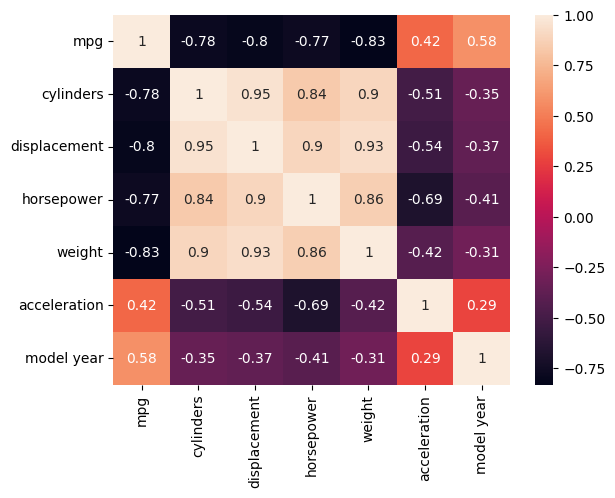

In [ ]:
sns.heatmap(auto_mpg_data.corr(), annot=True)

**Observations:**

Skewness:

*   In our data set, horsepower is highly skewed to the right.  Cylinders, displacement and weight are moderately skewed to the right.  This is expected since our dataset involves vintage cars.  The majority of vintage cars have lower horsepower, fewer cylinders (specifically 4), lower displacement (perhaps due to smaller  engine sizes) and lighter overall weight.
*   On the other hand, miles per gallon, accerlation and model year is nearly symmetric.  It seems that there is more consistent distribution of these measurements among vintage cars.

Correlation:

*   On the heatmap, we can see a strong positive correlation (+0.95) between the number of cylinders and displacement.  This suggests that as the number of cylinders in a car increases, the engine displacement tends to increase as well.  Since displacement is the total volume of air moved in an engine, having more cylinders in a car would increase the total volume of the engine.
*   There is also a strong positive correlation between weight and displacement (+0.93). Again, this is consistent since the more cylinders in a car would contribute to a heavier car.
*   Horsepower and displacement are also correlated positively (+0.9) - more engine displacement seems to contribute to more horsepower.
*   Weight and horsepower are correlated to a lesser extent (+0.86).  The number of cylinders is correlated to horsepower to a lesser extent as well (+0.84).  This may because while weight and number of cylinders influence horsepower, there are other factors that correlate to it more strongly (namely displacement).

*   As for negative correlation, miles per gallon is strongly negatively correlated to weight (-0.83), displacement (-0.8), horsepower (-0.77) and number of cylinders (-0.78).  As the weight, horsepower, number of cylinders and displacement increase, the miles per gallon decrease.  This is likely due to more fuel consumption of a heavier car and a more powerful engine.
*   Another notable negative correlation is acceleration and horsepower (-0.69).  As seen before, horsepower is positively correlated to weight.  That is, cars with higher horsepower are aso heavier.  Therefore, the negative correlation indicates that cars with higher horsepower may also be heavier, leading to slower acceleration.  (This is further supported by the moderlately negative correlation between weight and acceleration: -0.42).



### **Scaling the data**

In [ ]:
scaler = StandardScaler()

In [ ]:
auto_mpg_data_scaled = scaler.fit_transform(auto_mpg_data)
auto_mpg_data_scaled= pd.DataFrame(auto_mpg_data_scaled, columns=auto_mpg_data.columns)

In [ ]:
auto_mpg_data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [ ]:
auto_mpg_data_scaled.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,7.141133e-17,-3.570567e-17,-1.785283e-17,-7.141133e-17,-1.606755e-16,-2.677925e-16,-1.642461e-15
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.527300e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-7.414364e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-2.830161e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,7.027050e-01,1.498191e+00,6.584879e-01,5.421404e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,3.292662e+00,2.565185e+00,3.351912e+00,1.621983e+00


## **Principal Component Analysis**

In [ ]:
n=auto_mpg_data_scaled.shape[1]
print(n)

7


In [ ]:
pca = PCA(n_components = n, random_state=1)
pca_result = pca.fit_transform(auto_mpg_data_scaled)
pca_auto_mpg_data = pd.DataFrame(pca_result)
exp_var = pca.explained_variance_ratio_
print(exp_var)

[0.71476787 0.1236554  0.10414042 0.02671968 0.01778617 0.00790889
 0.00502158]


Text(0, 0.5, 'Cumulative Explained Variance')

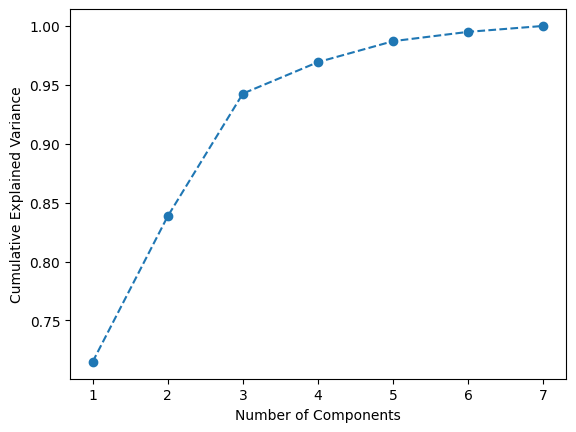

In [ ]:
plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--') #shows range of 1 to 7 columns
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

**Observations:**

*   This elbow curve shows that 3 components is able to explain more than 95% variance.  So, I will choose the first 3 principal components.




#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = auto_mpg_data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [ ]:
data_pca

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
PC1,-0.40,0.42,0.43,0.42,0.41,-0.28,-0.23
PC2,-0.21,-0.19,-0.18,-0.09,-0.22,0.02,-0.91
PC3,-0.26,0.14,0.10,-0.17,0.28,0.89,-0.02


**Observations:**

*   PC1 is related to the number of cylinders, dipslacement, horsepower and weight.  These all have high positive PC1 values.  When these values increase, they are associated with lower miles per gallon values.
*   For PC2 - the second most important trend involves model year.  It has a negative value.  All other factors are somewhat impacted negatively as well (other than acceleration which is netural).
*   Lastly, for PC3 - acceleration has a high positive value.  It is associated with negative miles per gallon.


#### **Visualize the data in 2 dimensions using the first two principal components**



In [ ]:
data_pca_t = data_pca.T

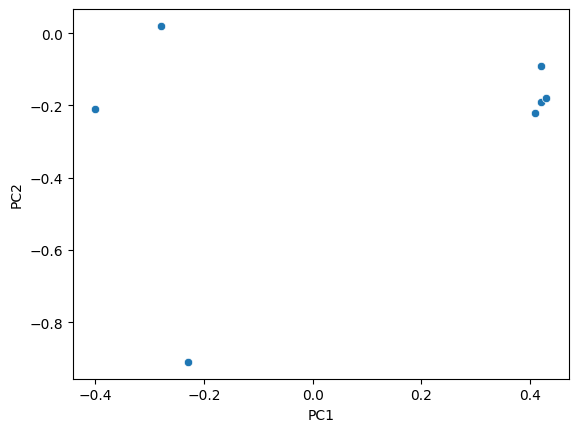

In [ ]:
plt.figure()
sns.scatterplot(x=data_pca_t['PC1'], y=data_pca_t['PC2'], data=data_pca_t)
plt.show()

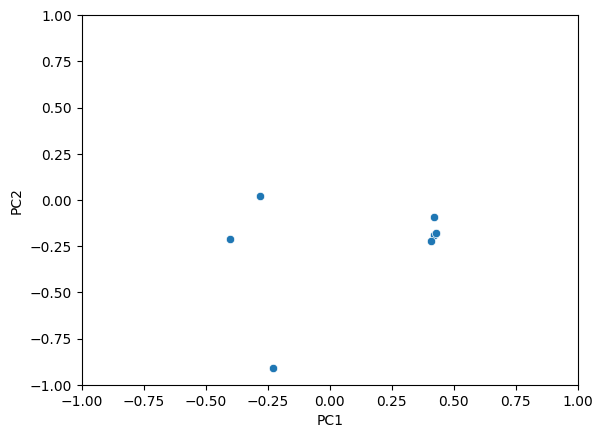

In [ ]:
#make scales the same
plt.figure()
sns.scatterplot(x=data_pca_t['PC1'], y=data_pca_t['PC2'], data=data_pca_t)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**Observations:**

*   While PC2 values are more constantly associated (around 0), PC1 values have a wider range of positive and negative values.

## **t-SNE**

In [ ]:
tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
data_tsne = tsne.fit_transform(auto_mpg_data_scaled)

In [ ]:
data_tsne.shape

(398, 2)

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['1', '2'])

In [ ]:
data_tsne.head()

,1,2
0,93.409897,150.222595
1,41.958649,-16.070107
2,-70.585777,12.146043
3,-70.869514,11.452102
4,116.632248,134.690491


<Axes: xlabel='1', ylabel='2'>

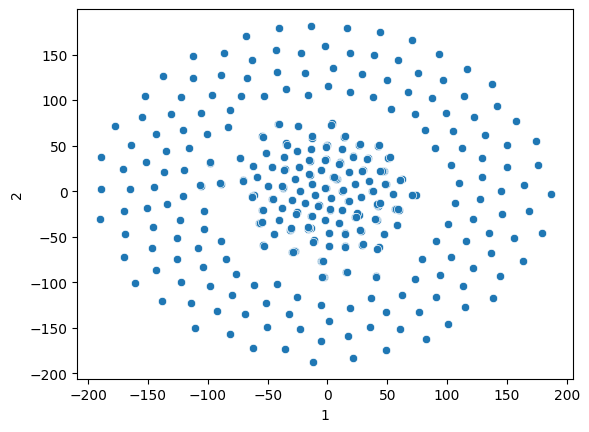

In [ ]:
sns.scatterplot(x = data_tsne['1'], y = data_tsne['2'])

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = auto_mpg_data.cylinders)
plt.show()

**Observations:**

*   I noticed that there are 2 major groups in the data: an outer ring and inner cicle.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

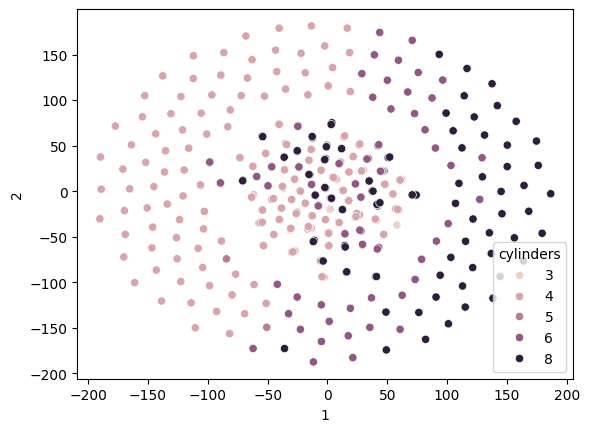

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = auto_mpg_data.cylinders)
plt.show()

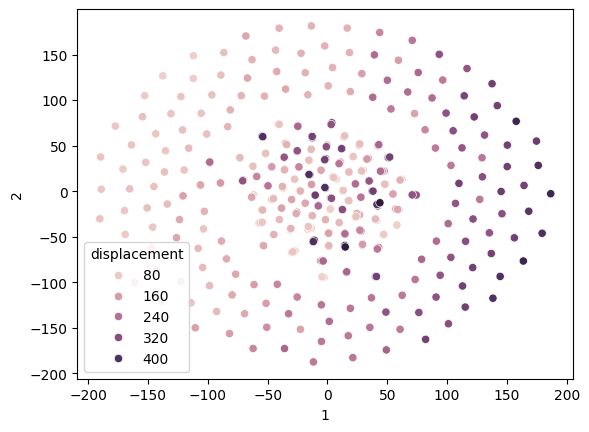

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = auto_mpg_data.displacement)
plt.show()

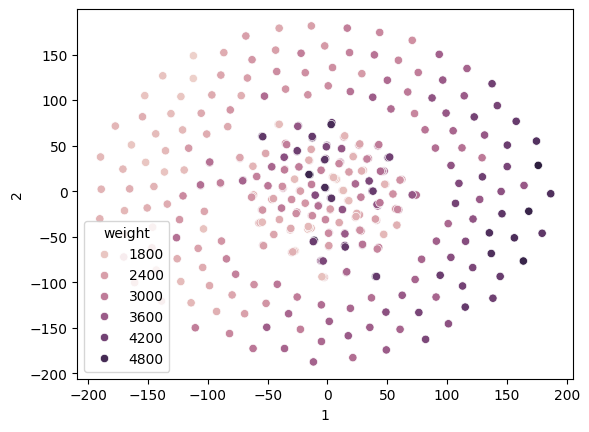

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = auto_mpg_data.weight)
plt.show()

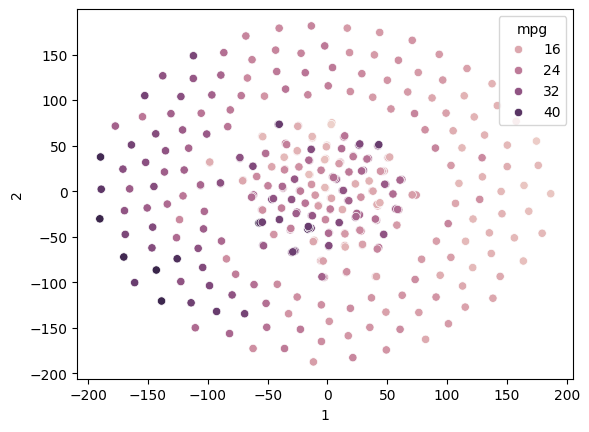

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = auto_mpg_data.mpg)
plt.show()

In [ ]:
# Creating 3 groups
def grouping(x):
    first_component = x['1']

    second_component = x['2']

    if first_component > 50:
        return 'group1'

    elif (-50 < first_component < 50) and (second_component > -50):
        return 'group_2'
    else:
        return 'group_3'

<Axes: xlabel='None'>

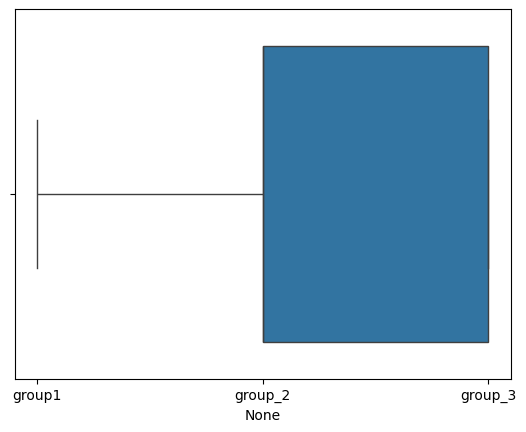

In [ ]:
sns.boxplot(data = data_tsne, x = data_tsne.apply(grouping, axis = 1))

**Observations:**

Scatterplot:

*   In the outer circle, there are 2 more different groups: left-hand side (3 cylinders, displacement of 80) and right-hand side (6 and 8 cylinders, mpg of 16 and 24).
*   There are no immediately apparent further broken-down or detailed groupings within the inner circle.

Boxplot:


*   I was able to get the groupings but struggle to create a visual.



## **Actionable Insights and Recommendations**

**Insights/Recommendations:**

*Description of Most of Our Cars:*
*   In my data cleanup, I had some missing values for horsepower, so I imputed these values with the median.  I used the median instead of the mean because horsepower is skewed.  The median is robust against skewness and outliers.
*   In my initial EDA, I noticed that many of the other variables were skewed as well.  Cylinders, displacement and weight were skewed to the right . This was expected since the dataset involves vintage cars.  For the most part, I learned that most vintage cars have lower horsepower, fewer cylinders and lower displacement.

*How Car Features are Connected:*
*   I conducted a heatmap and recognized that several factors are correlated with each other.  There is a strong positive correlation between cylinders and displacement, as well as weight and displacement.  Additionally, there is a correlation between horsepower and displacement.  Miles per gallon was negatively correlated with weight, displacement, horsepower and the number of cylinders.
*   My analysis for PCA shows that three principal components can explain more than 95% of the variance, so I studied these major variables.  Based on the PCA analysis, the features that contribtue most to the variance explained by the principal components include cylinders, displacement, horsepower and weight.  These are positive associations.  The secondary and tertiary princiapl components involve model year and acceleration.
*   These different groupings of features can help also guide the sales process.  When targeting the audience, this general relationship should help guide messaging.  In particular, we should pay attention to what the customer prioritizes more: power or gas efficiency.

*Types of prioritizations / products*
*   Patterns from the t-SNE show three major groupings.  There is one grouping with low number of cylinders, low displacement, lighter weight and higher miles per gallon (between 32-40).  Another grouping has more cylidners, more displacement, more weight and thus lower miles per gallon efficiency.  The third group is a mix of all features, which could be because of the various factors that balance one another.
*   One possible way to describe these groupings is leisure/recreational drivers, heavy drivers, and a blend.

*Final conclusion*
*   Given all of this information about correlations and groupings, it is apparent that each feature has trade-offs.  For example, higher horsepower is associated with lower mpg efficiency.  I recommend targeting the audience for this group since most of the vintage cars in this dataset have lower mpg.
*   A different audience we can look into are those who are looking for relatively higher mpg while also willing to compromise on other factors, including the horsepower (and number of cylinders in their car).
*   Overall, an audience looking to drive a vintage car will likely be aware of these compromises needed (given that a high proportion of these cars are profiled in the way we described before).  But some potential customers may be pleasantly surprised to find that there are cars that can fit their needs - we need to simply understand what their initial priorities are.
